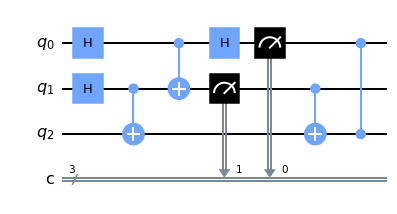

In [1]:
import qiskit
from qiskit import*
from qiskit.tools.visualization import*


circuit= QuantumCircuit(3,3)
circuit.h([0,1]) # here application of hadmard on first (q0) will give you the plus state
circuit.cx(1,2)   #creating entanglement
circuit.cx(0,1)   #teleporting circuit
circuit.h(0)
circuit.measure([0,1],[0,1])
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

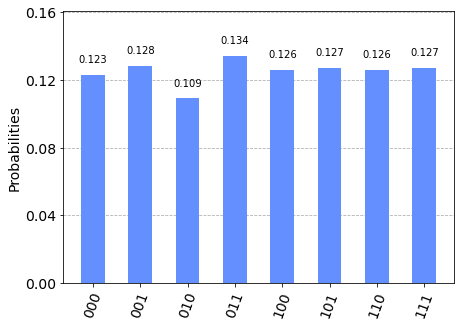

In [2]:
circuit.measure(2,2)
simulator= Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator).result()
counts = result.get_counts()
plot_histogram(counts)

succesfully transfered the PLUS state from q0 to q2

## Now lets go for the real IBMQ

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Job Status: job has successfully run


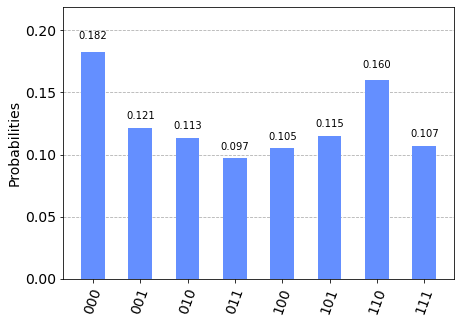

In [5]:


provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_quito')
# loading a device from IBM

job = execute(circuit,backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result= job.result()
plot_histogram(result.get_counts(circuit))


# look at the qubit q2, its always in the plus state
### so we succesfully transported it from q0 to q2